In [3]:
import nltk
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:

def train_cluster(nb, x, y):
    X = x[y]
    tfidfvectorizer = TfidfVectorizer(max_features=8000, use_idf=True, stop_words='english',
                                      tokenizer=nltk.word_tokenize)
    tfidfmatrix = tfidfvectorizer.fit_transform(X)
    km = KMeans(n_clusters=nb)
    km.fit(tfidfmatrix)
    x['cluster'] = km.labels_
    return x, tfidfmatrix

In [72]:


def compute_metrics(df, X, gold="cat", cluster="cluster"):
    return {"Silhouette": metrics.silhouette_score(X, df[gold]),
            "Homogeneity": metrics.homogeneity_score(df[gold], df[cluster]),
            "Completeness": metrics.completeness_score(df[gold], df[cluster]),
            "V_measure": metrics.completeness_score(df[gold], df[cluster]),
            'Adjusted rand': metrics.adjusted_rand_score(df[gold], df[cluster])}


def visualise(df, fr=2, to=16):
    res = {}
    for x in range(fr, to + 1):
        result, y = train_cluster(x, df, "processed_text_only")
        data = compute_metrics(result, y)
        res[str(x)] = data
    return res

In [79]:
df = pd.read_json("dataframe.json")
df['processed_text_only'] = df['processed_text'].apply(lambda x: " ".join(x[1]))
df['processed_desc_only'] = df['processed_desc'].apply(lambda x: " ".join(x[1]) if x else "")
df.head()

,person,text,processed_text,desc,processed_desc,cat,base,processed_text_only,processed_desc_only
0,Mittarfik Nerlerit Inaat,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland
1,Nerlerit Inaat Lufthavn,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland
2,Constable Pynt Lufthavn,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland
3,Nerlerit Inaat Airport,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland
4,Red Dog Airport,"Red Dog Airport (IATA: RDB, ICAO: PADG, FAA LI...","[[[red, JJ], [dog, NN], [airport, NN], [iata, ...","airport in Alaska, United States of America","[[[airport, NN], [alaska, NNS], [unit, NN], [s...",Airports,Q4392064,red dog airport iata rdb icao padg faa lid dgg...,airport alaska unit state america


In [73]:
res = visualise(df)

<AxesSubplot:>

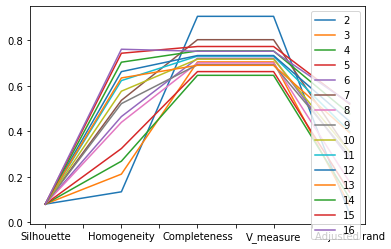

In [78]:
vis = pd.DataFrame.from_dict(res)
vis.plot()